## 1. Empregados e seus Departamentos (INNER JOIN)

In [ ]:

 - Liste todos os empregados juntamente com o nome de seus departamentos.
 SELECT
  E.*,
  D.NOME AS DEPARTAMENTO_NOME
FROM
  EMPREGADO E
INNER JOIN
  DEPARTAMENTO D
ON E.NUMDEPTO = D.NUMDEPTO

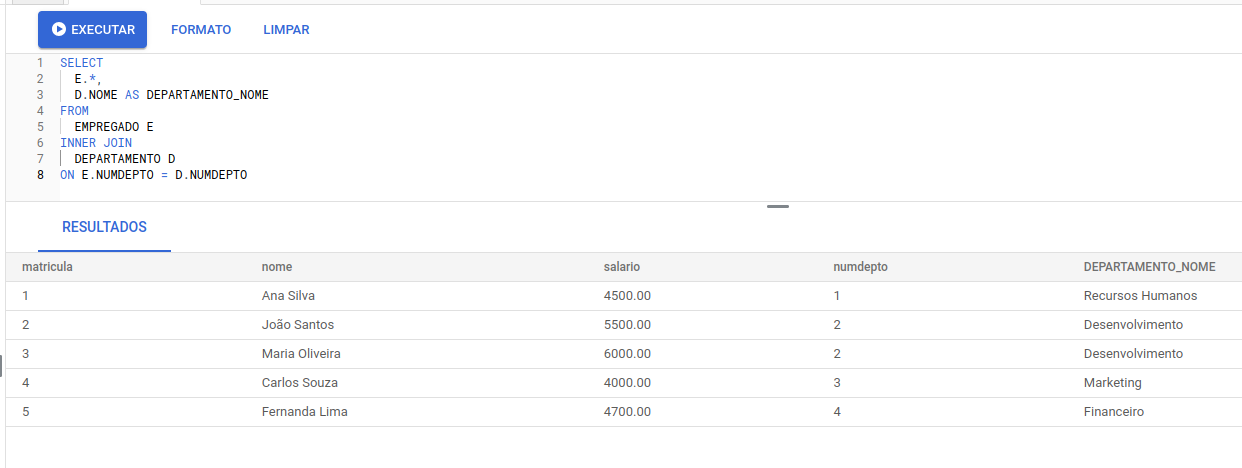

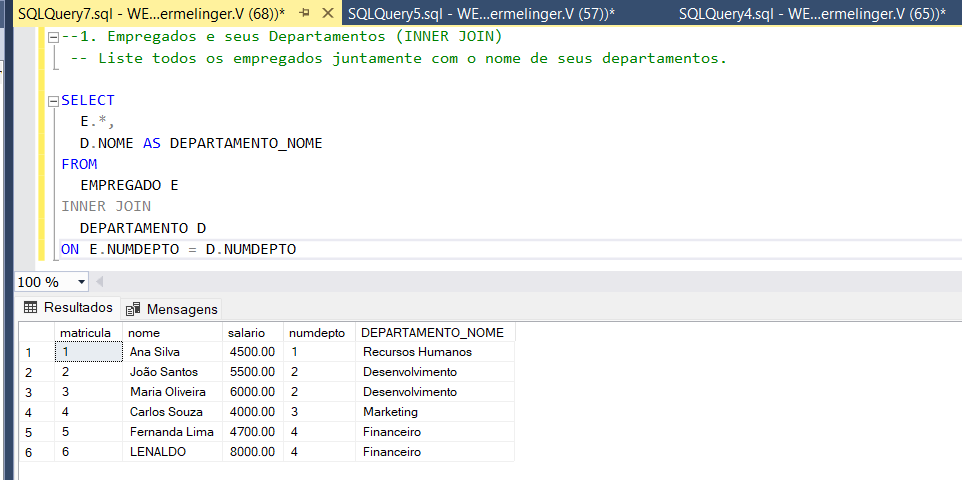

## 2. Empregados sem Departamento (LEFT JOIN + IS NULL)

In [ ]:
 -- Liste todos os empregados que não estão associados a nenhum departamento

SELECT e.matricula, e.nome, e.salario, e.numdepto
FROM EMPREGADO e
LEFT JOIN DEPARTAMENTO d ON e.numdepto = d.numdepto
WHERE d.numdepto IS NULL;

-- OU

SELECT e.*
FROM EMPREGADO e
LEFT JOIN DEPARTAMENTO d ON e.numdepto = d.numdepto
WHERE d.numdepto IS NULL;

-- Todos os empregasdos estão ligados a algum departamento

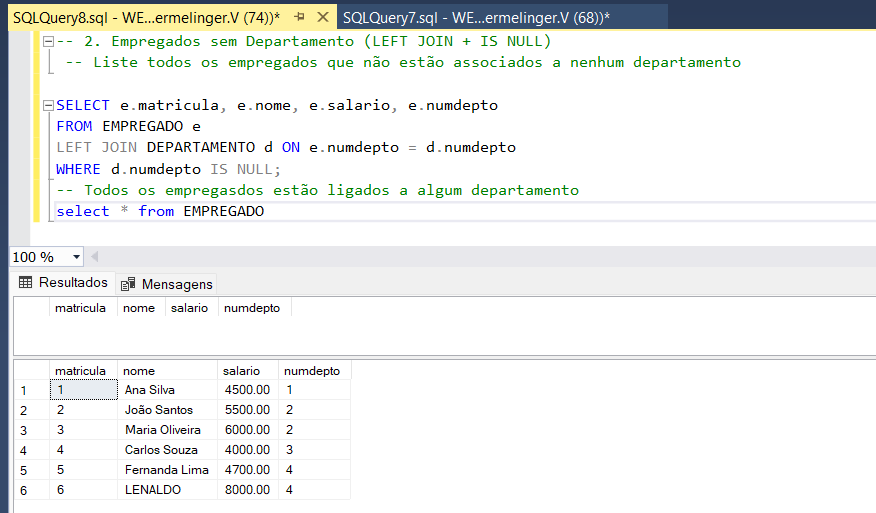

## 3. Projetos sem Empregados (LEFT JOIN + IS NULL)

In [ ]:
 -- Liste todos os projetos que não têm empregados associados

SELECT
    P.nome AS Nome_Projeto,
    GROUP_CONCAT(E.nome SEPARATOR ', ') AS Empregados_Associados,
    D.nome AS Nome_Departamento,
    GROUP_CONCAT(H.descricao SEPARATOR ', ') AS Habilidades
FROM
    PROJETO P
LEFT JOIN
    TRABALHA_EM TE ON P.codprojeto = TE.codprojeto
LEFT JOIN
    EMPREGADO E ON TE.matricula = E.matricula
LEFT JOIN
    DEPARTAMENTO D ON E.numdepto = D.numdepto
LEFT JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
LEFT JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
WHERE
    TE.matricula IS NULL
GROUP BY
    P.codprojeto, P.nome, D.nome
ORDER BY
    P.nome;

-- projeto E não tem ninguem trabalhando nele;


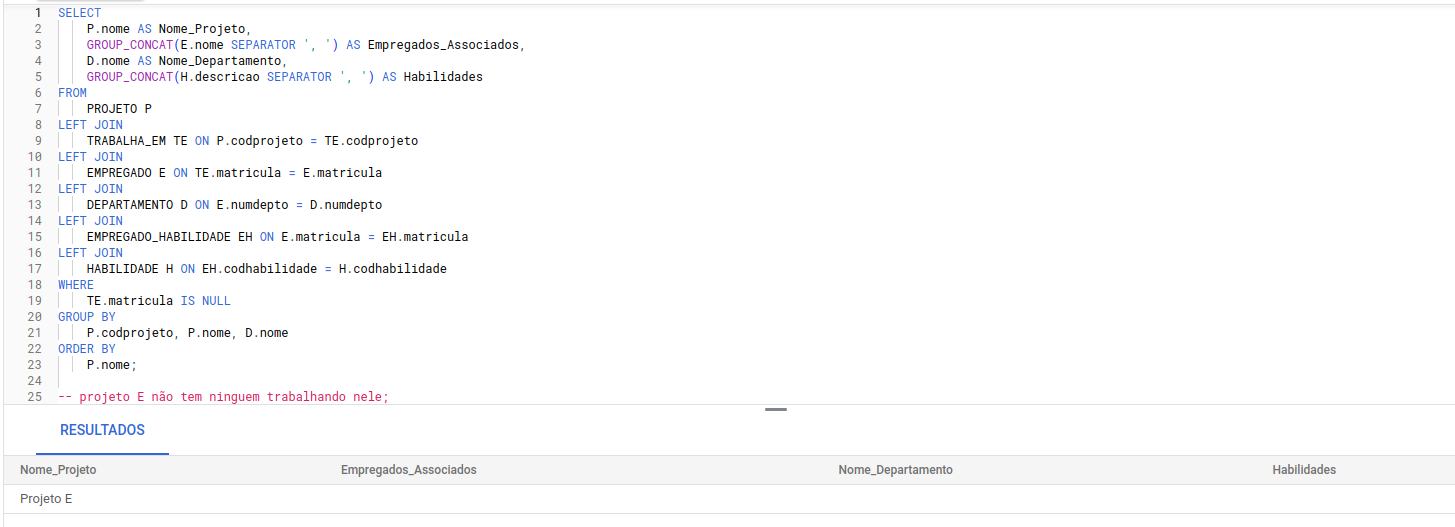

In [ ]:
SELECT
    P.nome AS Nome_Projeto,
    GROUP_CONCAT(E.nome SEPARATOR ', ') AS Empregados_Associados,
    D.nome AS Nome_Departamento,
    GROUP_CONCAT(H.descricao SEPARATOR ', ') AS Habilidades
FROM
    PROJETO P
LEFT JOIN
    TRABALHA_EM TE ON P.codprojeto = TE.codprojeto
LEFT JOIN
    EMPREGADO E ON TE.matricula = E.matricula
LEFT JOIN
    DEPARTAMENTO D ON E.numdepto = D.numdepto
LEFT JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
LEFT JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
WHERE
    TE.matricula
GROUP BY
    P.codprojeto, P.nome, D.nome
ORDER BY
    P.nome;

-- Projetos com seus colaboradores

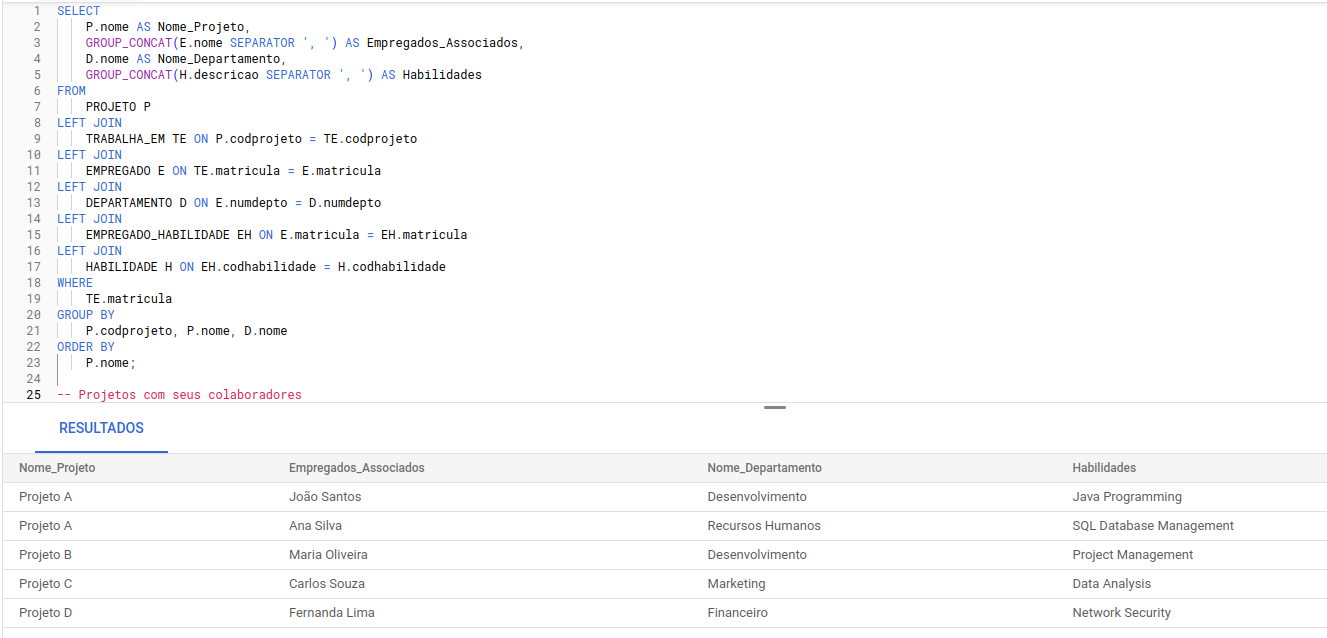

In [ ]:
-- ENCONTRAR OS EMPREGADOS SEM PROJETOS
SELECT
    EMPREGADO.*
FROM
    EMPREGADO
LEFT JOIN
    TRABALHA_EM ON EMPREGADO.matricula = TRABALHA_EM.matricula
WHERE
    TRABALHA_EM.matricula IS NULL;

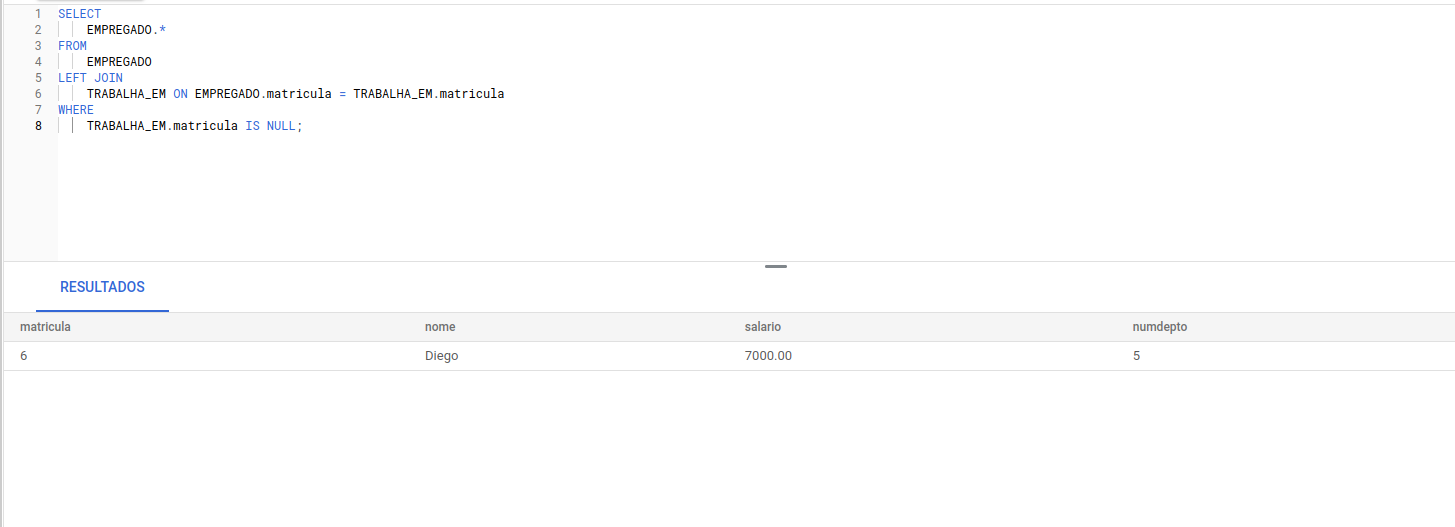

## 4. Empregados e suas Habilidades (INNER JOIN)

In [ ]:

-- Liste todos os empregados juntamente com suas habilidades.

SELECT
    E.nome AS Nome_Empregado,
    GROUP_CONCAT(H.descricao SEPARATOR ', ') AS Habilidades
FROM
    EMPREGADO E
INNER JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
INNER JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
GROUP BY
    E.matricula, E.nome
ORDER BY
    E.nome;


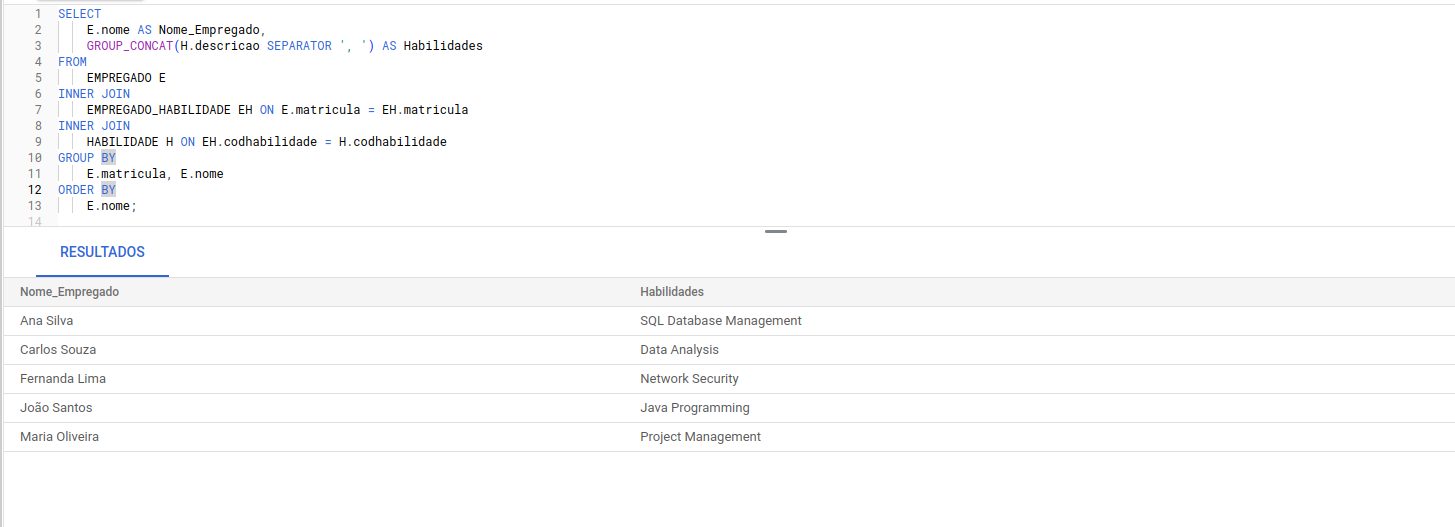

## 5. Empregados sem Habilidades (LEFT JOIN + IS NULL)

In [ ]:

-- Liste todos os empregados que não têm habilidades associadas.
SELECT
    EMPREGADO.nome AS empregado_nome
FROM
    EMPREGADO
LEFT JOIN
    EMPREGADO_HABILIDADE ON EMPREGADO.matricula = EMPREGADO_HABILIDADE.matricula
WHERE
    EMPREGADO_HABILIDADE.codhabilidade IS NULL;

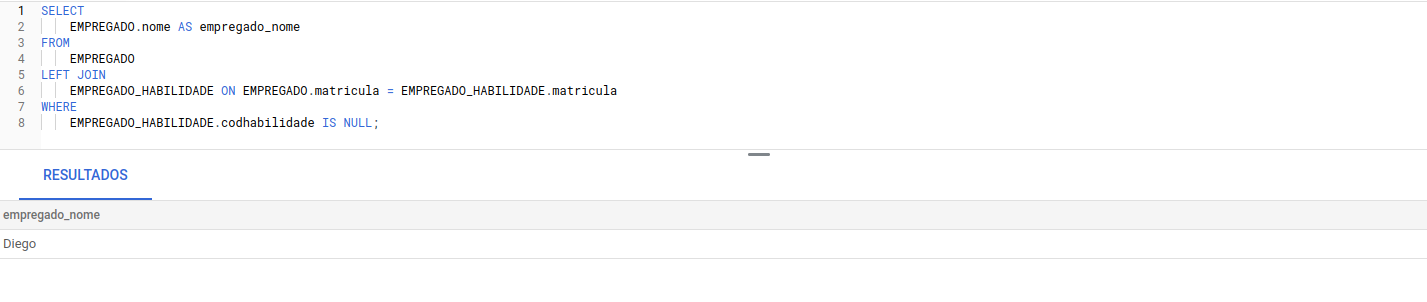

## 6. Departamentos e Número de Empregados (LEFT JOIN + COUNT)


In [ ]:
-- Liste todos os departamentos e o número de empregados em cada um.
SELECT
    D.nome AS Nome_Departamento,
    COUNT(E.matricula) AS Numero_Empregados
FROM
    DEPARTAMENTO D
LEFT JOIN
    EMPREGADO E ON D.numdepto = E.numdepto
GROUP BY
    D.numdepto, D.nome
ORDER BY
    D.nome;

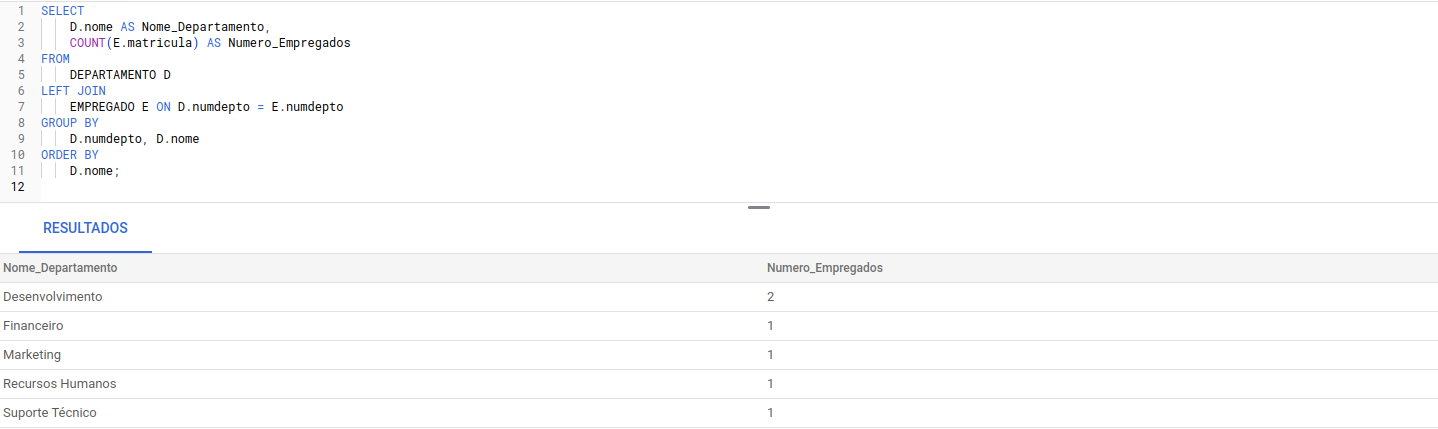

## 7. Empregados e seus Projetos (INNER JOIN)


In [ ]:
-- Liste todos os empregados juntamente com os projetos em que estão trabalhando.
SELECT
    P.nome AS Nome_Projeto,
    GROUP_CONCAT(E.nome SEPARATOR ', ') AS Empregados_Associados,
    D.nome AS Nome_Departamento,
    GROUP_CONCAT(H.descricao SEPARATOR ', ') AS Habilidades
FROM
    PROJETO P
LEFT JOIN
    TRABALHA_EM TE ON P.codprojeto = TE.codprojeto
LEFT JOIN
    EMPREGADO E ON TE.matricula = E.matricula
LEFT JOIN
    DEPARTAMENTO D ON E.numdepto = D.numdepto
LEFT JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
LEFT JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
WHERE
    TE.matricula
GROUP BY
    P.codprojeto, P.nome, D.nome
ORDER BY
    P.nome;

-- Projetos com seus colaboradores

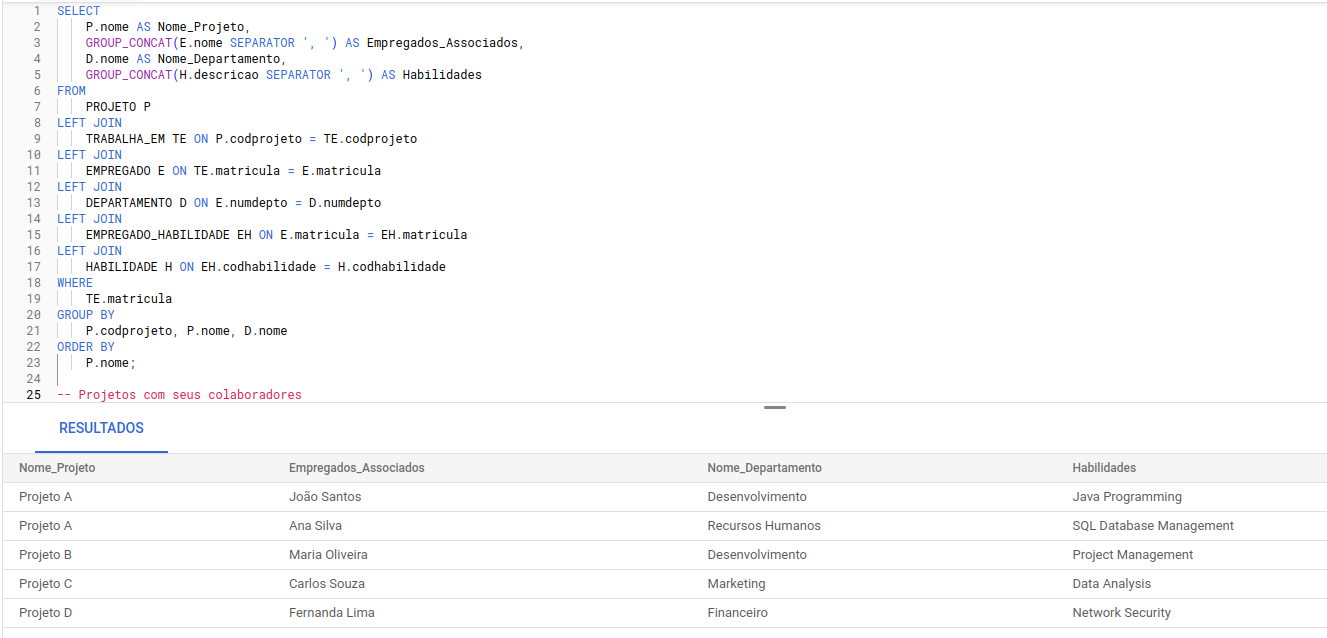

## 8. Empregados em Projetos Atuais (INNER JOIN + WHERE)


In [ ]:
-- Liste todos os empregados que estão trabalhando em projetos que ainda não
terminaram.
SQL Server: Use GETDATE() e, se necessário, CAST(GETDATE() AS DATE) para obter apenas a data.

SELECT
    E.nome AS Nome_Empregado,
    P.nome AS Nome_Projeto
FROM
    EMPREGADO E
INNER JOIN
    TRABALHA_EM TE ON E.matricula = TE.matricula
INNER JOIN
    PROJETO P ON TE.codprojeto = P.codprojeto
WHERE
    P.data_fim IS NULL OR P.data_fim > CURRENT_DATE -- Filtra os projetos que ainda não terminaram. Considera projetos sem data de término ou com uma data de término futura em relação à data atual.
ORDER BY
    E.nome, P.nome;

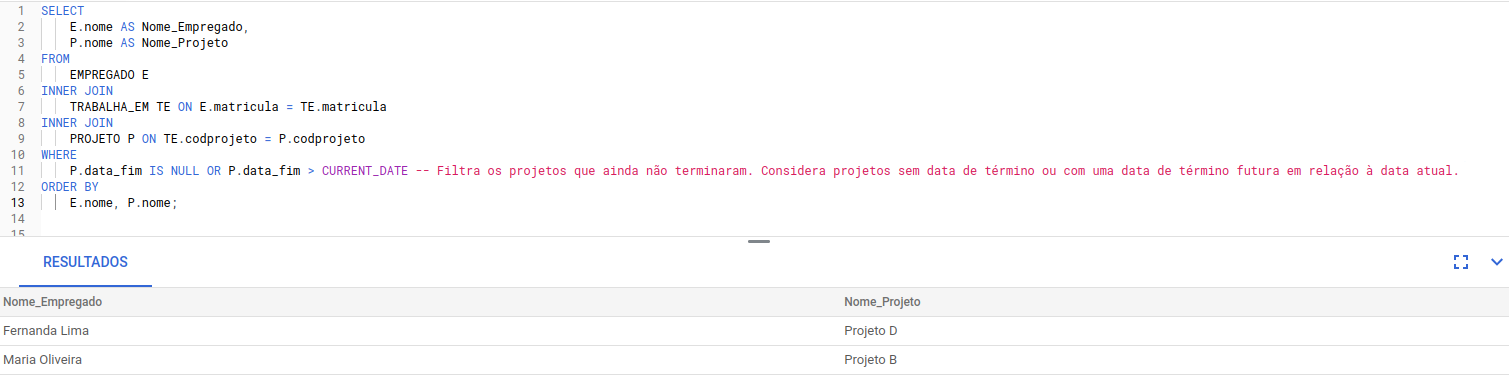

## 9. Projetos e Duração (DATEDIFF)


In [ ]:
-- Liste todos os projetos juntamente com a duração em dias (diferente entre data_fim e data_inicio).
SELECT
    P.nome AS Nome_Projeto,
    P.data_inicio AS Data_Inicio,
    P.data_fim AS Data_Fim,
    DATEDIFF(P.data_fim, P.data_inicio) AS Duracao_Dias
FROM
    PROJETO P
ORDER BY
    P.nome;

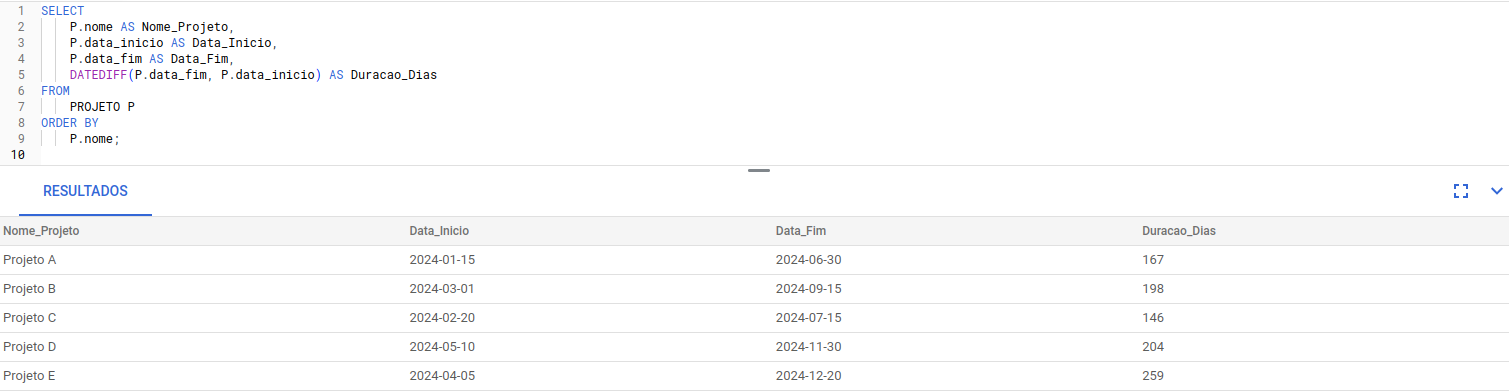

## 10. Empregados com Mais de uma Habilidade (INNER JOIN + HAVING COUNT)


In [ ]:
-- Liste todos os empregados que têm mais de uma habilidade.
SELECT
    E.nome AS Nome_Empregado,
    COUNT(H.codhabilidade) AS Numero_Habilidades
FROM
    EMPREGADO E
INNER JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
INNER JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
GROUP BY
    E.matricula, E.nome
HAVING
    COUNT(H.codhabilidade) > 1
ORDER BY
    E.nome;


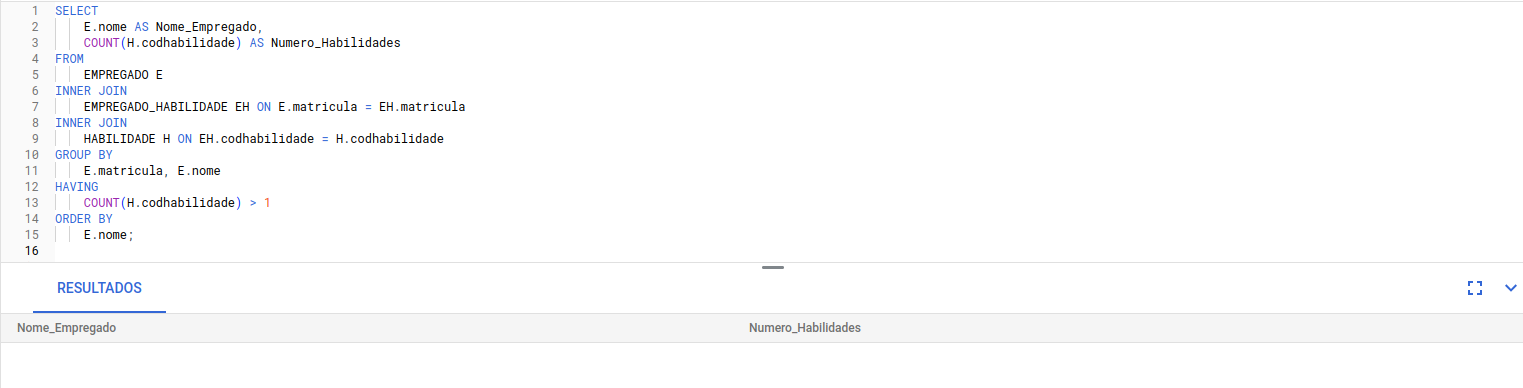

## 11. Departamentos e Salário Médio (LEFT JOIN + AVG)


In [ ]:
-- Liste todos os departamentos juntamente com o salário médio dos empregados
em cada departamento.

SELECT
    D.nome AS Nome_Departamento,
    AVG(E.salario) AS Salario_Medio
FROM
    DEPARTAMENTO D
LEFT JOIN
    EMPREGADO E ON D.numdepto = E.numdepto
GROUP BY
    D.numdepto, D.nome
ORDER BY
    D.nome;


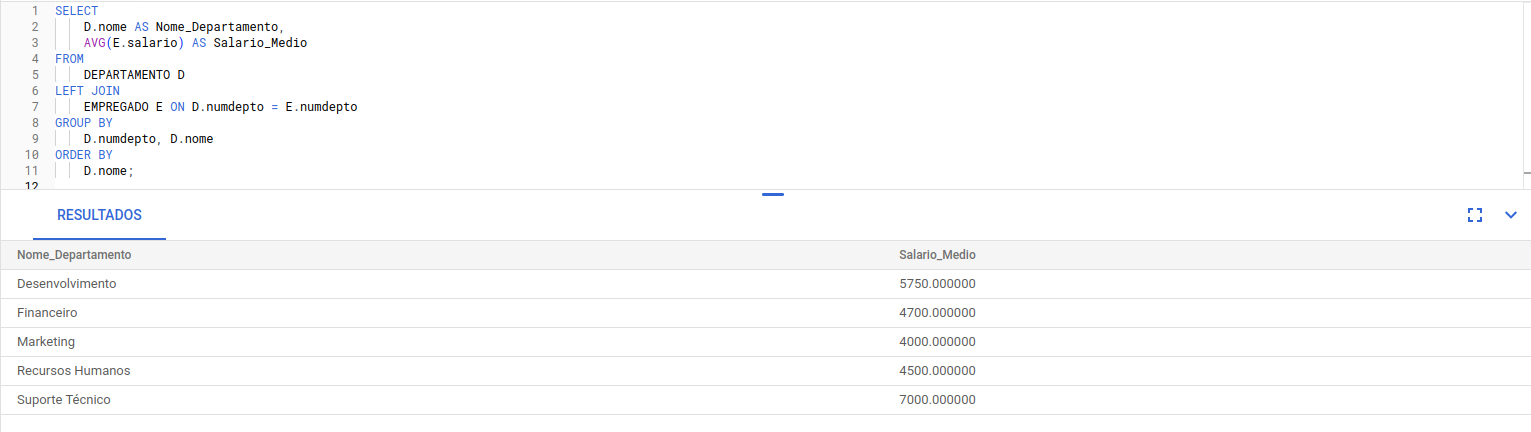

## 12. Empregados e suas Habilidades Ordenadas (INNER JOIN + ORDER BY)


In [ ]:
-- Liste todos os empregados juntamente com suas habilidades, ordenando os
resultados pelo nome do empregado e pela descrição da habilidade.
SELECT
    E.nome AS Nome_Empregado,
    H.descricao AS Descricao_Habilidade
FROM
    EMPREGADO E
INNER JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
INNER JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
ORDER BY
    E.nome, H.descricao;


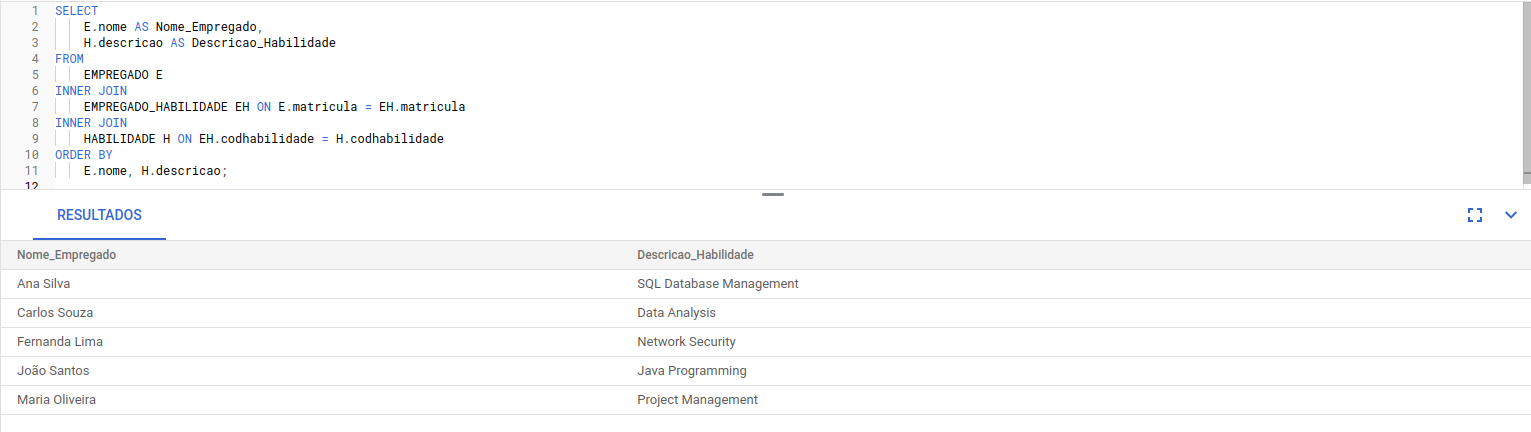

## 13. Projetos e Número de Empregados (INNER JOIN + COUNT)


In [ ]:
-- Liste todos os projetos juntamente com o número de empregados que estão trabalhando em cada projeto.
SELECT
    P.nome AS Nome_Projeto,
    COUNT(TE.matricula) AS Numero_Empregados
FROM
    PROJETO P
INNER JOIN
    TRABALHA_EM TE ON P.codprojeto = TE.codprojeto
GROUP BY
    P.codprojeto, P.nome
ORDER BY
    P.nome;

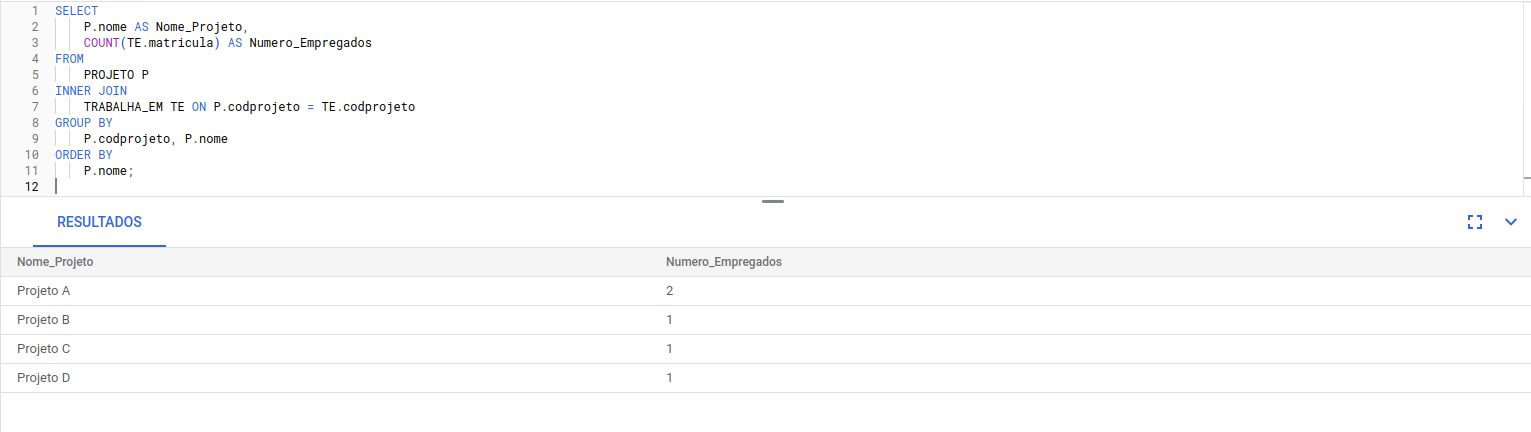

## 14. Empregados com Habilidades Específicas (INNER JOIN + WHERE)


In [ ]:
-- Liste todos os empregados que possuem uma habilidade específica (por exemplo, "SQL").
SELECT
    E.nome AS Nome_Empregado
FROM
    EMPREGADO E
INNER JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
INNER JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
WHERE
    H.descricao = 'SQL'
ORDER BY
    E.nome;


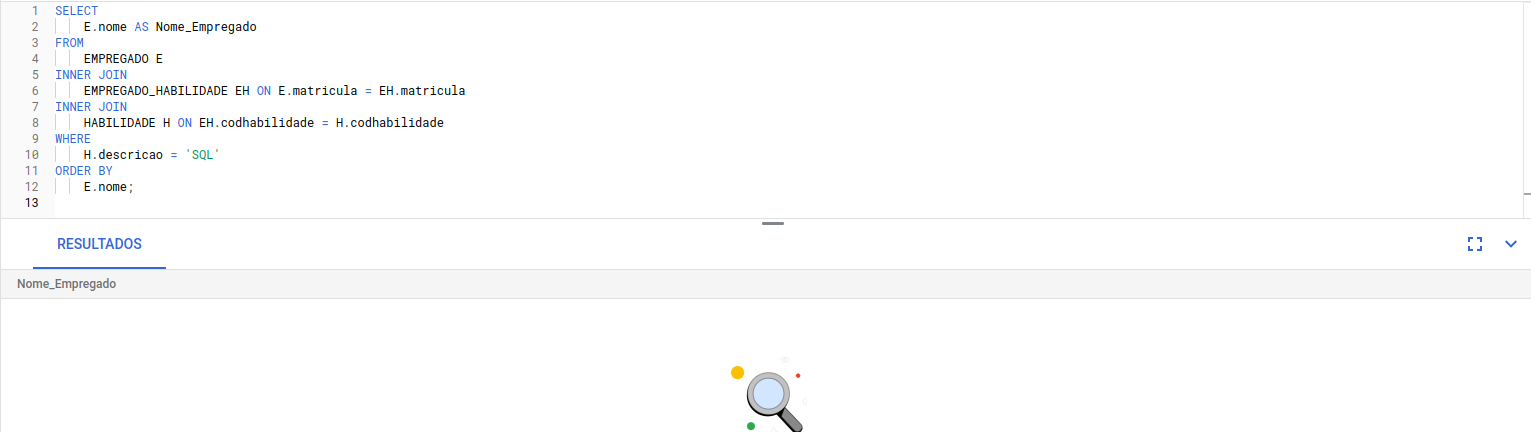

In [ ]:
SELECT
    E.nome AS Nome_Empregado
FROM
    EMPREGADO E
INNER JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
INNER JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
WHERE H.descricao LIKE '%SQL%'
ORDER BY E.nome;


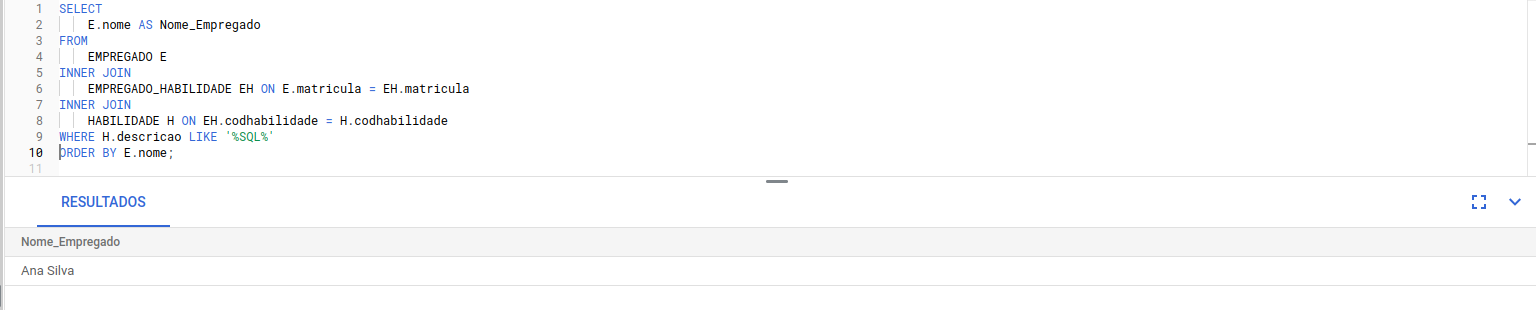

## 15. Departamentos sem Empregados (LEFT JOIN + IS NULL)


In [ ]:
-- Liste todos os departamentos que não têm empregados associados.
SELECT
    D.nome AS Nome_Departamento,
    E.nome AS Nome_Funcionario
FROM
    DEPARTAMENTO D
LEFT JOIN
    EMPREGADO E ON D.numdepto = E.numdepto
WHERE
    E.matricula IS NOT NULL
ORDER BY
    D.nome;

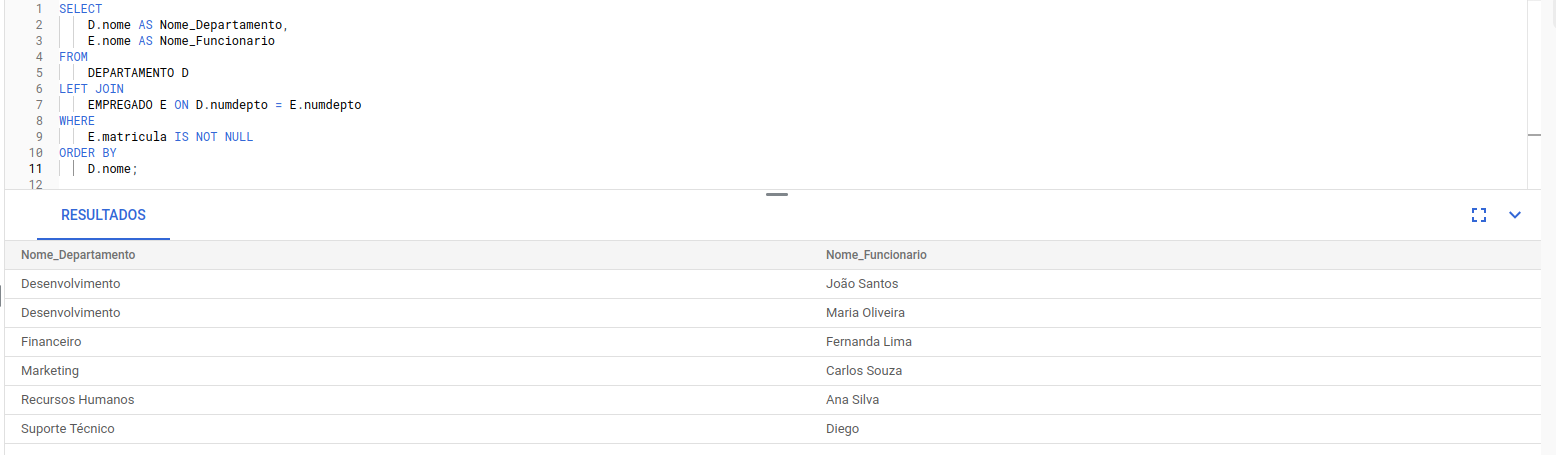

## 16. Projetos Ativos e seus Empregados (INNER JOIN + WHERE)


In [ ]:
-- Liste todos os projetos que ainda estão em andamento e os empregados que estão trabalhando neles.
SELECT
    P.nome AS Nome_Projeto,
    E.nome AS Nome_Empregado
FROM
    PROJETO P
INNER JOIN
    TRABALHA_EM TE ON P.codprojeto = TE.codprojeto
INNER JOIN
    EMPREGADO E ON TE.matricula = E.matricula
WHERE
    P.data_fim IS NULL OR P.data_fim > CURDATE()
ORDER BY
    P.nome, E.nome;


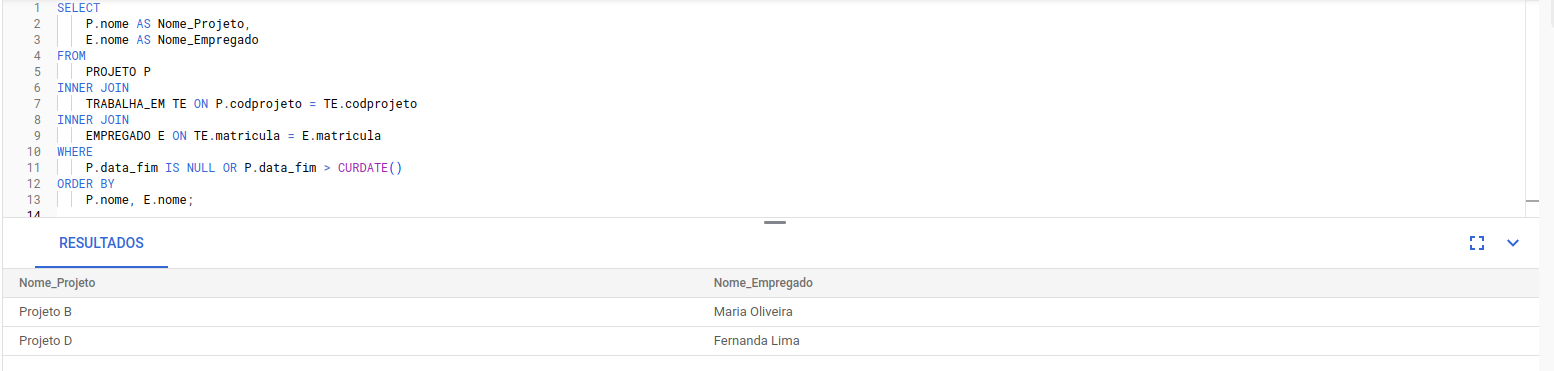

## 17. Empregados e suas Habilidades e Projetos (INNER JOIN + Multiple Tables)

In [ ]:
-- Liste todos os empregados juntamente com suas habilidades e os projetos em que estão trabalhando.
SELECT
    E.nome AS Nome_Empregado,
    H.descricao AS Habilidade,
    P.nome AS Nome_Projeto
FROM
    EMPREGADO E
INNER JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
INNER JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
INNER JOIN
    TRABALHA_EM TE ON E.matricula = TE.matricula
INNER JOIN
    PROJETO P ON TE.codprojeto = P.codprojeto
ORDER BY
    E.nome, H.descricao, P.nome;


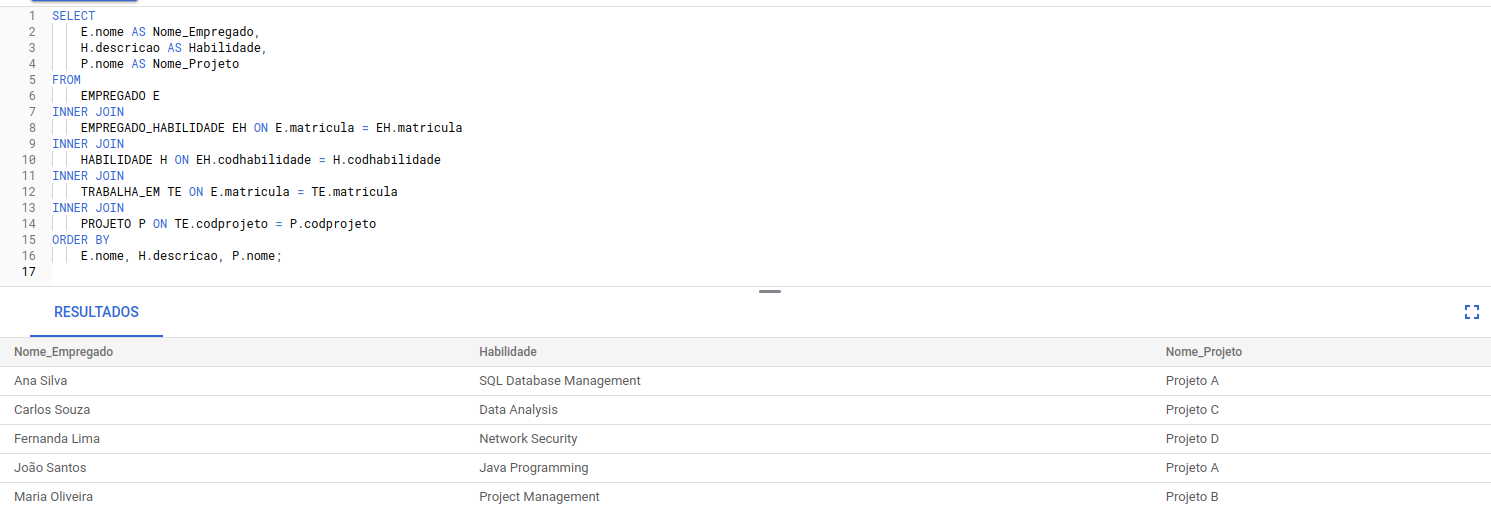


## 18. Projetos e Data de Início mais Recente (INNER JOIN + MAX)


In [ ]:
-- Liste todos os projetos juntamente com a data de início mais recente de um empregado que começou a trabalhar nesse projeto.
SELECT
    P.nome AS Nome_Projeto,
    MAX(TE.data_inicio) AS Data_Inicio_Mais_Recente
FROM
    PROJETO P
INNER JOIN
    TRABALHA_EM TE ON P.codprojeto = TE.codprojeto
GROUP BY
    P.codprojeto, P.nome
ORDER BY
    P.nome;


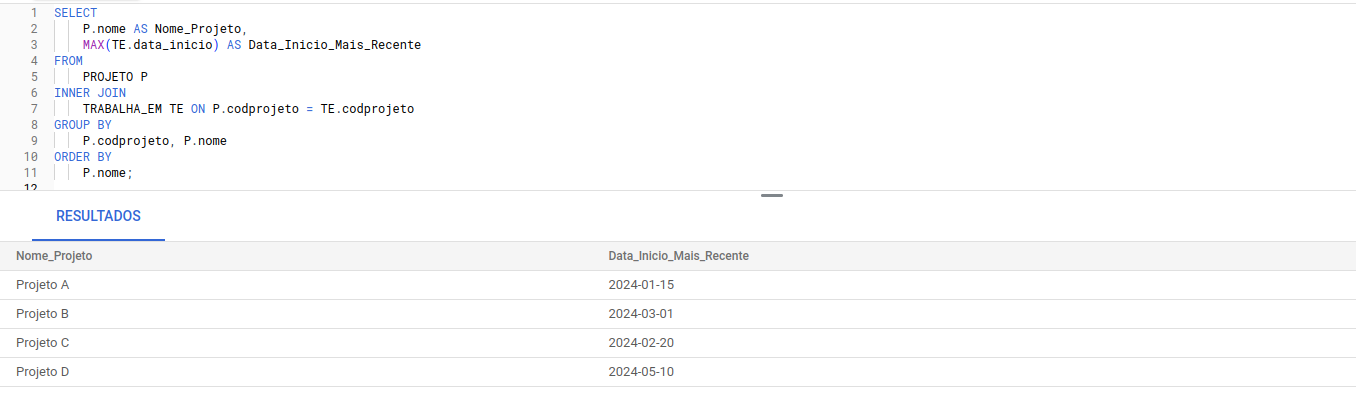

## 19. Empregados que Trabalham em Mais de um Projeto (INNER JOIN + HAVING + COUNT)


In [ ]:
-- Liste todos os empregados que estão trabalhando em mais de um projeto.
SELECT
    E.nome AS Nome_Empregado,
    COUNT(DISTINCT TE.codprojeto) AS Numero_Projetos
FROM
    TRABALHA_EM TE
INNER JOIN
    EMPREGADO E ON TE.matricula = E.matricula
GROUP BY
    E.nome
HAVING
    COUNT(DISTINCT TE.codprojeto) > 1
ORDER BY
    Numero_Projetos DESC, E.nome;

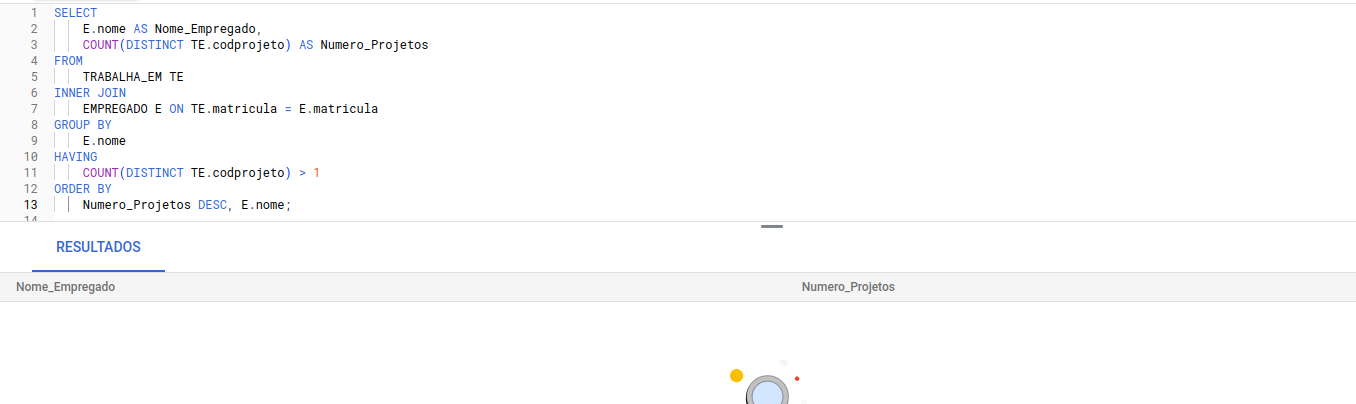

In [ ]:
-- Liste todos os empregados que estão trabalhando em projeto e pode ser o mesmo projeto
SELECT
    E.nome AS Nome_Empregado,
    P.nome AS Nome_Projeto
FROM
    TRABALHA_EM TE
INNER JOIN
    EMPREGADO E ON TE.matricula = E.matricula
INNER JOIN
    PROJETO P ON TE.codprojeto = P.codprojeto
ORDER BY
    P.nome, E.nome;


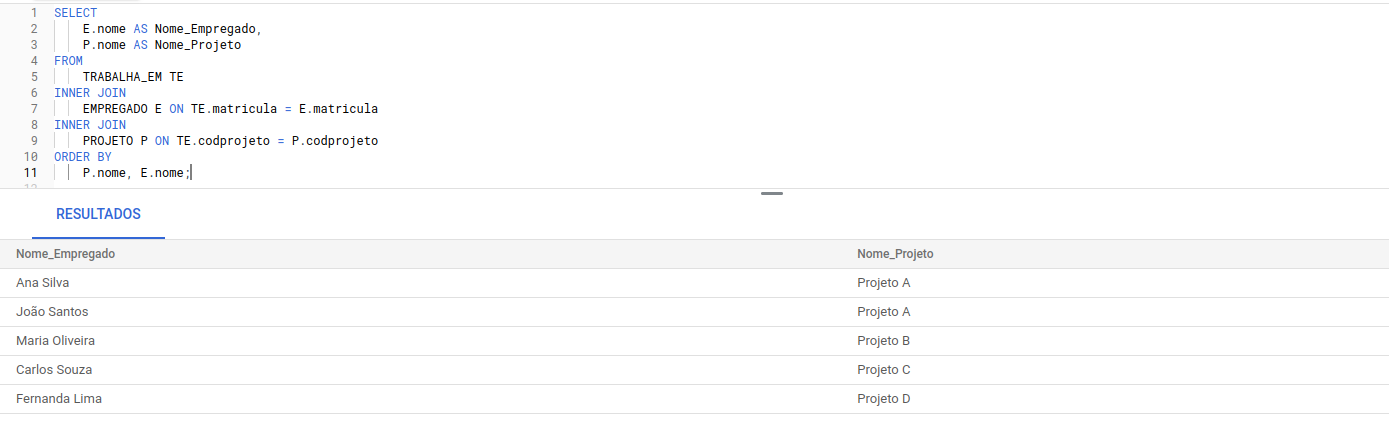

## 20. Empregados e Departamento, Habilidade e Projeto (Multiple INNER JOINs)


In [ ]:
-- Liste todos os empregados juntamente com o nome do departamento, a descrição
SELECT
    E.nome AS Nome_Empregado,
    D.nome AS Nome_Departamento,
    P.nome AS Nome_Projeto,
    H.descricao AS Descricao_Habilidade
FROM
    EMPREGADO E
INNER JOIN
    DEPARTAMENTO D ON E.numdepto = D.numdepto
INNER JOIN
    TRABALHA_EM TE ON E.matricula = TE.matricula
INNER JOIN
    PROJETO P ON TE.codprojeto = P.codprojeto
INNER JOIN
    EMPREGADO_HABILIDADE EH ON E.matricula = EH.matricula
INNER JOIN
    HABILIDADE H ON EH.codhabilidade = H.codhabilidade
ORDER BY
    P.nome, E.nome, D.nome;


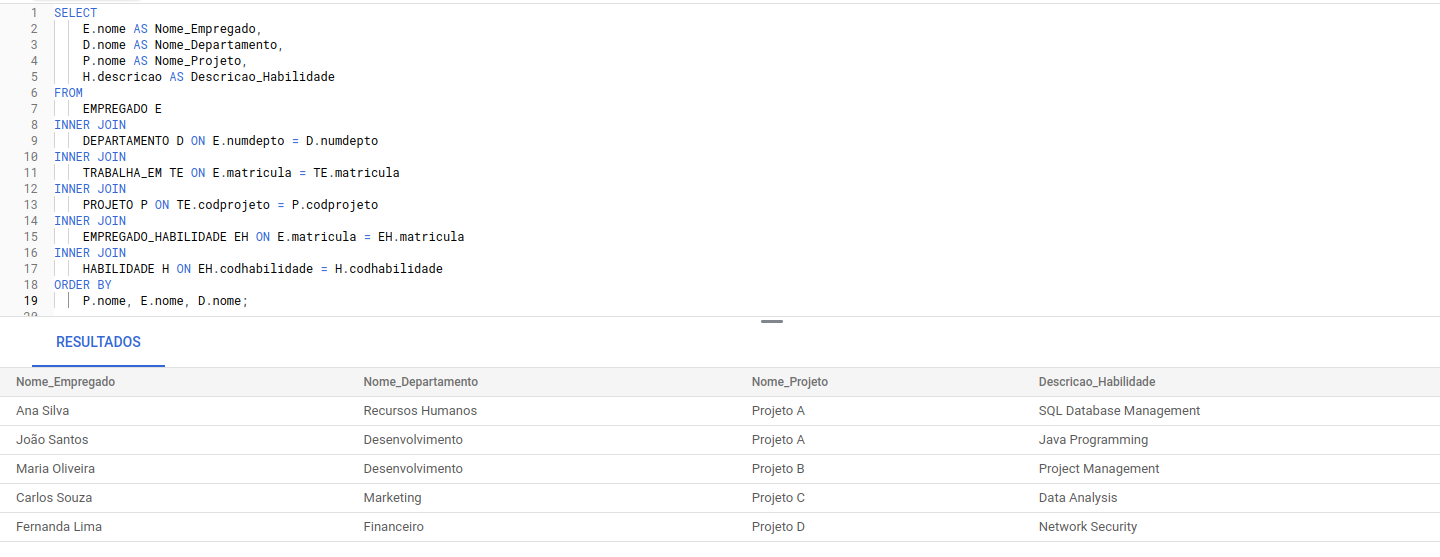